In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.saving import save_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Carregar o dataset
with open('../datasets/fg_dataset.pkl','rb') as f:
    data = pickle.load(f)

In [7]:
# Extrair os dados de treino e teste
(x_train, y_train), (x_test, y_test) = data

x_train = x_train.astype("float32") /255
x_train = np.array([image.reshape((128, 128, 3)) for image in x_train])

x_test = x_test.astype("float32") /255
x_test = np.array([image.reshape((128, 128, 3)) for image in x_test])

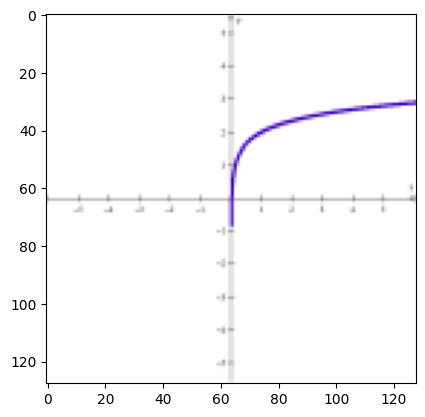

logarítmica


In [9]:
# Visualizar  as imagens
img_nr = 1299
plt.imshow(x_train[img_nr].reshape(128,128,3))
plt.show()

classes = {0:'linear', 1: 'quadrática', 2:'cúbica', 3:'exponencial', 4:'logarítmica',
                    5:'raíz quadrada', 6:'seno', 7:'cosseno', 8:'tangente', 9:'cotangente'}

print(classes[np.argmax(y_train[img_nr])])

In [10]:
# Definir o modelo
model = Sequential([
    Input(shape=(128, 128, 3)),  # Usar Input(shape) como a primeira camada
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),

    Dense(128, activation='relu'),
   
    Dense(10, activation='softmax')
])


# Compilar o modelo
model.compile(
              optimizer=Adam(
                      learning_rate=0.001
              ),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Definir Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a ser monitorada
    patience=2,           # Número de épocas sem melhora antes de parar o treinamento
    verbose=1             # Mostrar mensagens de log
)


# Treinar o modelo
history = model.fit(x_train, y_train, 
                    epochs=40, 
                    validation_split=0.15,
                    callbacks = [early_stopping])


Epoch 1/40
347/347 ━━━━━━━━━━━━━━━━━━━━ 73s 209ms/step - accuracy: 0.4846 - loss: 1.4724 - val_accuracy: 0.8902 - val_loss: 0.3250
Epoch 2/40
347/347 ━━━━━━━━━━━━━━━━━━━━ 74s 214ms/step - accuracy: 0.9307 - loss: 0.2101 - val_accuracy: 0.9356 - val_loss: 0.1964
Epoch 3/40
347/347 ━━━━━━━━━━━━━━━━━━━━ 80s 231ms/step - accuracy: 0.9762 - loss: 0.0717 - val_accuracy: 0.9642 - val_loss: 0.1549
Epoch 4/40
347/347 ━━━━━━━━━━━━━━━━━━━━ 81s 233ms/step - accuracy: 0.9891 - loss: 0.0359 - val_accuracy: 0.9734 - val_loss: 0.1059
Epoch 5/40
347/347 ━━━━━━━━━━━━━━━━━━━━ 80s 232ms/step - accuracy: 0.9921 - loss: 0.0264 - val_accuracy: 0.9750 - val_loss: 0.1077
Epoch 6/40
347/347 ━━━━━━━━━━━━━━━━━━━━ 81s 233ms/step - accuracy: 0.9976 - loss: 0.0102 - val_accuracy: 0.9801 - val_loss: 0.1132
Epoch 6: early stopping


In [11]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9732 - loss: 0.1196
Test accuracy: 0.9765517115592957


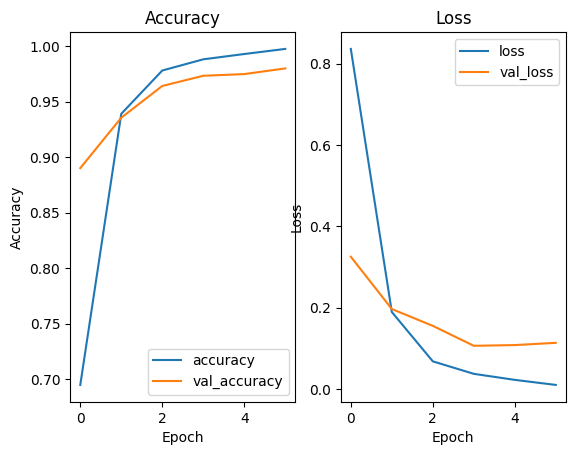

In [13]:

# Plotar acurácia
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()


# Plotar loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


<h3 style=color:Magenta>Save Model</h3>

In [14]:
# Salvar o modelo treinado no formato nativo do Keras
save_model(model, '../models/modeloNovo.keras')


In [ ]:
# Salvar o histórico em um arquivo JSON
with open('../models/history.json', 'w') as f:
    json.dump(history.history, f)